## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\zuoo5\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\zuoo5\Anaco

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units,  
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [16, 32, 128, 256]
MOMENTUM = 0.95

In [8]:
results = {}

for batch_size in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Batch_Size = %d" % (batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "batch-size-%d" % int(batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Batch_Size = 16
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)    

50000/50000 [==============================] - 25s 498us/step - loss: 0.5152 - acc: 0.8183 - val_loss: 1.7575 - val_acc: 0.5251
Epoch 47/50
50000/50000 [==============================] - 25s 496us/step - loss: 0.5095 - acc: 0.8193 - val_loss: 1.7498 - val_acc: 0.5143
Epoch 48/50
50000/50000 [==============================] - 25s 497us/step - loss: 0.4977 - acc: 0.8274 - val_loss: 1.7765 - val_acc: 0.5206
Epoch 49/50
50000/50000 [==============================] - 25s 498us/step - loss: 0.4860 - acc: 0.8305 - val_loss: 1.9258 - val_acc: 0.5129
Epoch 50/50
50000/50000 [==============================] - 25s 500us/step - loss: 0.4809 - acc: 0.8291 - val_loss: 2.1227 - val_acc: 0.4756
Experiment with Batch_Size = 32
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (D

50000/50000 [==============================] - 13s 267us/step - loss: 0.2814 - acc: 0.9003 - val_loss: 2.3797 - val_acc: 0.4828
Epoch 42/50
50000/50000 [==============================] - 13s 264us/step - loss: 0.2834 - acc: 0.9011 - val_loss: 2.2363 - val_acc: 0.5083
Epoch 43/50
50000/50000 [==============================] - 13s 264us/step - loss: 0.2696 - acc: 0.9046 - val_loss: 2.4395 - val_acc: 0.4893
Epoch 44/50
50000/50000 [==============================] - 13s 263us/step - loss: 0.2618 - acc: 0.9081 - val_loss: 2.3571 - val_acc: 0.5008
Epoch 45/50
50000/50000 [==============================] - 13s 264us/step - loss: 0.2595 - acc: 0.9086 - val_loss: 2.3973 - val_acc: 0.5018
Epoch 46/50
50000/50000 [==============================] - 13s 265us/step - loss: 0.2489 - acc: 0.9128 - val_loss: 2.4377 - val_acc: 0.4753
Epoch 47/50
50000/50000 [==============================] - 13s 267us/step - loss: 0.2441 - acc: 0.9143 - val_loss: 2.4719 - val_acc: 0.4914
Epoch 48/50
50000/50000 [=======

50000/50000 [==============================] - 5s 99us/step - loss: 0.1045 - acc: 0.9713 - val_loss: 2.8374 - val_acc: 0.4522
Epoch 37/50
50000/50000 [==============================] - 5s 99us/step - loss: 0.1019 - acc: 0.9713 - val_loss: 3.2893 - val_acc: 0.4267
Epoch 38/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.0975 - acc: 0.9729 - val_loss: 2.6095 - val_acc: 0.4732
Epoch 39/50
50000/50000 [==============================] - 5s 98us/step - loss: 0.0877 - acc: 0.9765 - val_loss: 2.7436 - val_acc: 0.4717
Epoch 40/50
50000/50000 [==============================] - 5s 99us/step - loss: 0.0796 - acc: 0.9796 - val_loss: 2.7720 - val_acc: 0.4717
Epoch 41/50
50000/50000 [==============================] - 5s 98us/step - loss: 0.0808 - acc: 0.9781 - val_loss: 3.1133 - val_acc: 0.4382
Epoch 42/50
50000/50000 [==============================] - 5s 100us/step - loss: 0.0783 - acc: 0.9791 - val_loss: 2.9930 - val_acc: 0.4629
Epoch 43/50
50000/50000 [===================

50000/50000 [==============================] - 3s 66us/step - loss: 0.1760 - acc: 0.9618 - val_loss: 2.1420 - val_acc: 0.4817
Epoch 32/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.1603 - acc: 0.9665 - val_loss: 2.1983 - val_acc: 0.4658
Epoch 33/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.1411 - acc: 0.9733 - val_loss: 2.4055 - val_acc: 0.4559
Epoch 34/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.1284 - acc: 0.9770 - val_loss: 2.2368 - val_acc: 0.4734
Epoch 35/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.1177 - acc: 0.9792 - val_loss: 2.3261 - val_acc: 0.4686
Epoch 36/50
50000/50000 [==============================] - 3s 68us/step - loss: 0.1055 - acc: 0.9824 - val_loss: 2.2917 - val_acc: 0.4815
Epoch 37/50
50000/50000 [==============================] - 3s 69us/step - loss: 0.0953 - acc: 0.9847 - val_loss: 2.5704 - val_acc: 0.4610
Epoch 38/50
50000/50000 [=====================

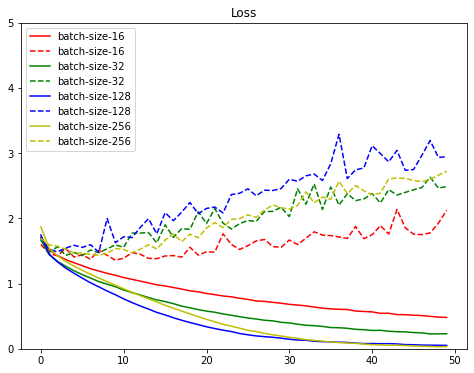

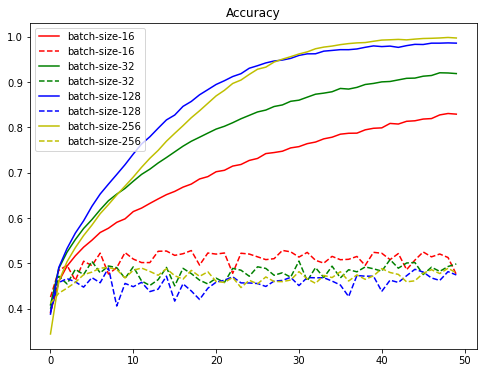

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()